## ORDINARY LEAST MEAN SQUARE METHOD(ordinary way of solving the regression method)
we are going to implement the Ordinary Least square method to predict Brain weights from datasets to measure the accuracy.


In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading the Data
dataset = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\headbrain.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


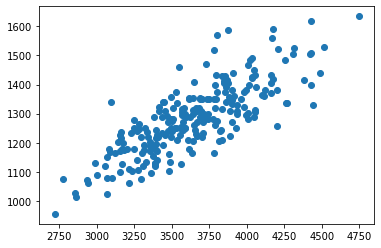

In [2]:
plt.scatter(dataset['Head Size(cm^3)'],dataset['Brain Weight(grams)'])

see some linearity we check some correlation.

In [3]:
np.corrcoef(dataset['Head Size(cm^3)'],dataset['Brain Weight(grams)'])[0,1]

0.7995697092542962

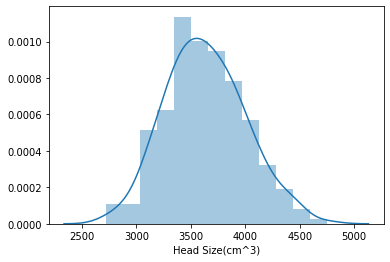

In [4]:
#Distribution plot to see the independent variables
sb.distplot(dataset['Head Size(cm^3)'])

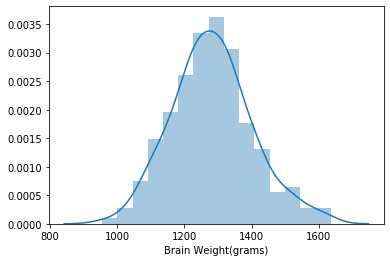

In [5]:
sb.distplot(dataset['Brain Weight(grams)'])

In [6]:
dataset['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

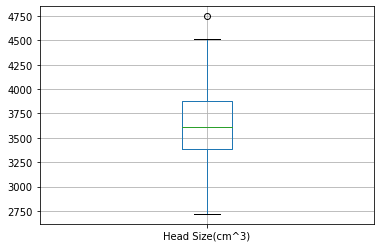

In [7]:
# To check the outlier if any
dataset.boxplot(column='Head Size(cm^3)')

In [20]:
#Using simple linear regression
#FINDING THE RELATION BETWEEN THE HEAD SIZE AND BRAIN WEIGHTS
x = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

In [22]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [24]:
# Total number of values
m = len(x)

In [27]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):# i in range for total no. of records(m)
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

 #Print coefficients(slope and intercepts)
print(b1, b0)

0.26342933948939945 325.57342104944223


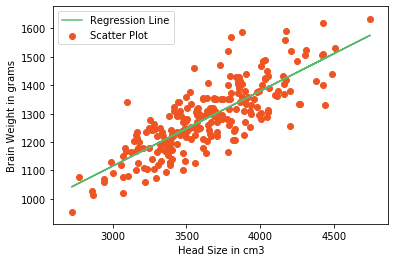

In [28]:
# y prediction with b0 and b1
y_pred = b0 +b1 * X

# Plotting Line ( best fit line or regression line)
plt.plot(X, y_pred, color='#58b970', label='Regression Line')

#Plotting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [29]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [30]:
ss_t = 0 #total sum of square
ss_r = 0 #total sum of square of residuals
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


## USING Sci-Kit - A MACHINE LEARNING PACKAGE 
Calculating Root mean square error
model = linear regression()
model_fit()
model_prediction()
model_score()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
# Cannot use Rank 1 matrix in scikit learn
X= X.reshape((m, 1))

In [33]:
#Creating Model
reg = LinearRegression()

#Fitting training data
reg = reg.fit(X, Y)

#Y Prediction
y_pred = reg.predict(X)

#Calculating RMSE and R2 Score
mse = mean_squared_error(Y, y_pred)
rmse =np.sqrt(mse)
r2_score = reg.score(X, Y)


In [34]:
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
